In [53]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import linear_model
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
sb.set()

In [54]:
rawdata = pd.read_csv('high_diamond_ranked_10min.csv')

In [55]:
print(len(rawdata))

9879


In [56]:
kdrlist = []

In [57]:
for a in (range(len(rawdata))):
    if(rawdata['blueDeaths'][a] != 0):
        kdrlist.append(rawdata['blueKills'][a] / rawdata['blueDeaths'][a])
    else:
        kdrlist.append(rawdata['blueKills'][a] / 1)

    

In [58]:
rawdata['Blue KDR'] = kdrlist

In [59]:
vision=[]

In [60]:
for a in (range(len(rawdata))):
        vision.append(rawdata['blueWardsPlaced'][a]+rawdata['blueWardsDestroyed'][a])

In [61]:
rawdata['vision_score'] = vision

In [62]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    
    return ls

In [63]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = rawdata.drop(ls)
    return df

In [64]:
index_list = []
for column in ['Blue KDR', 'blueGoldDiff', 'blueExperienceDiff']:
    index_list.extend(outliers(rawdata, column))
print("Initial shape of data: ", rawdata.shape)
cleaned = remove(rawdata, index_list)
print("Shape of cleaned dataset", cleaned.shape)

Initial shape of data:  (9879, 42)
Shape of cleaned dataset (9075, 42)


In [65]:
cleaned

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,Blue KDR,vision_score
0,4519157822,0,28,2,1,9,6,11,0,0,...,6.8,17047,197,55,-643,8,19.7,1656.7,1.500000,30
1,4523371949,0,12,1,0,5,5,5,0,0,...,6.8,17438,240,52,2908,1173,24.0,1762.0,1.000000,13
2,4521474530,0,15,0,0,7,11,4,1,1,...,6.8,17254,203,28,1172,1033,20.3,1728.5,0.636364,15
3,4524384067,0,43,1,0,4,5,5,1,0,...,7.0,17961,235,47,1321,7,23.5,1647.8,0.800000,44
4,4436033771,0,75,4,0,6,6,6,0,0,...,7.0,18313,225,67,1004,-230,22.5,1740.4,1.000000,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,6.8,16498,229,34,-2519,-2469,22.9,1524.6,1.750000,19
9875,4527797466,1,54,0,0,6,4,8,1,1,...,7.0,18367,206,56,-782,-888,20.6,1545.6,1.500000,54
9876,4527713716,0,23,1,0,6,7,5,0,0,...,7.4,19909,261,60,2416,1877,26.1,1831.9,0.857143,24
9877,4527628313,0,14,4,1,2,3,3,1,1,...,7.2,18314,247,40,839,1085,24.7,1529.8,0.666667,18


In [66]:
independents = pd.DataFrame(cleaned[['Blue KDR', 'blueGoldDiff', 'blueExperienceDiff','vision_score']])

In [67]:
independents

,Blue KDR,blueGoldDiff,blueExperienceDiff,vision_score
0,1.500000,643,-8,30
1,1.000000,-2908,-1173,13
2,0.636364,-1172,-1033,15
3,0.800000,-1321,-7,44
4,1.000000,-1004,230,79
...,...,...,...,...
9874,1.750000,2519,2469,19
9875,1.500000,782,888,54
9876,0.857143,-2416,-1877,24
9877,0.666667,-839,-1085,18


In [68]:
dependents = pd.DataFrame(cleaned['blueWins'])

In [69]:
dependents

,blueWins
0,0
1,0
2,0
3,0
4,0
...,...
9874,1
9875,1
9876,0
9877,0


In [70]:
combined = pd.DataFrame(cleaned[['Blue KDR', 'blueGoldDiff', 'blueExperienceDiff', 'vision_score','blueWins']])

In [71]:
combined

,Blue KDR,blueGoldDiff,blueExperienceDiff,vision_score,blueWins
0,1.500000,643,-8,30,0
1,1.000000,-2908,-1173,13,0
2,0.636364,-1172,-1033,15,0
3,0.800000,-1321,-7,44,0
4,1.000000,-1004,230,79,0
...,...,...,...,...,...
9874,1.750000,2519,2469,19,1
9875,1.500000,782,888,54,1
9876,0.857143,-2416,-1877,24,0
9877,0.666667,-839,-1085,18,0


In [72]:
combined['blueWins'].value_counts()

0    4793
1    4282
Name: blueWins, dtype: int64

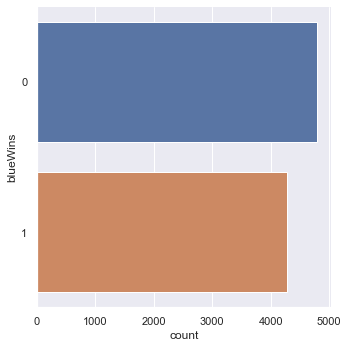

In [73]:
sb.catplot(y = "blueWins", data = combined, kind = "count")

In [74]:
combined.describe()

,Blue KDR,blueGoldDiff,blueExperienceDiff,vision_score,blueWins
count,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000
mean,1.094280,-247.958457,-216.012672,25.175647,0.471846
std,0.669227,2145.157204,1703.162516,18.357200,0.499234
min,0.000000,-6324.000000,-5037.000000,6.000000,0.000000
25%,0.600000,-1673.000000,-1362.000000,17.000000,0.000000
50%,1.000000,-177.000000,-191.000000,19.000000,0.000000
75%,1.500000,1230.000000,963.500000,24.000000,1.000000
max,3.250000,6289.000000,4903.000000,254.000000,1.000000


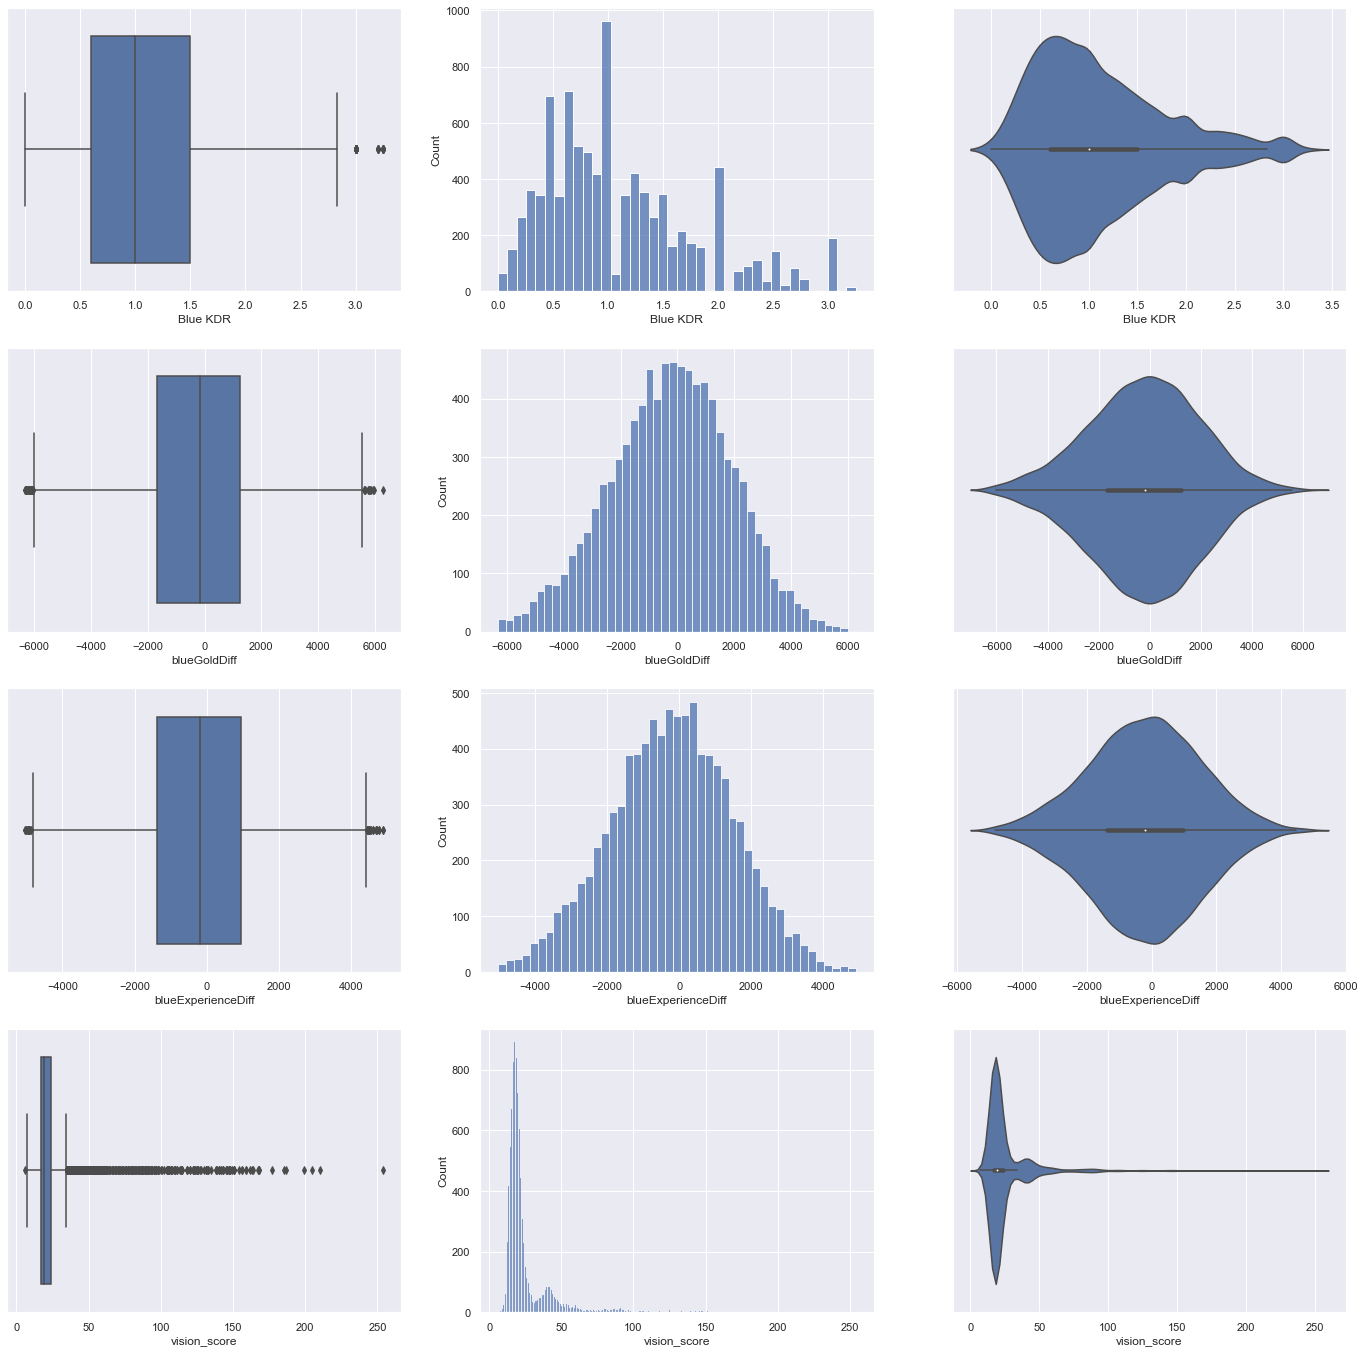

In [75]:
f, axes = plt.subplots(4, 3, figsize=(24, 24))
a= 0
for col in independents:
    sb.boxplot(x = col, data = combined, orient = "h", ax = axes[a][0])
    sb.histplot(x = col, data = combined, ax = axes[a][1])
    sb.violinplot(x = col, data = combined, orient = "h", ax = axes[a][2])
    a+=1

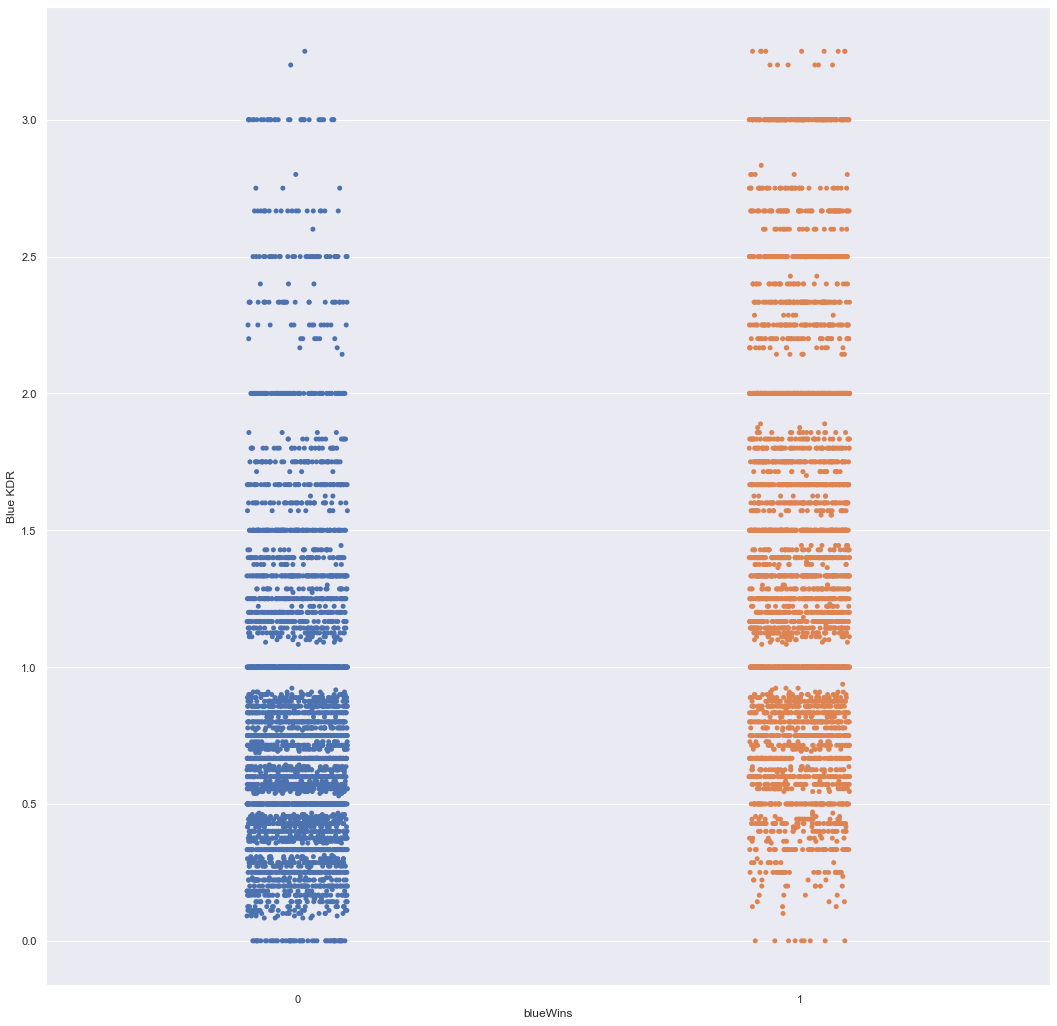

In [76]:
f = plt.figure(figsize=(18, 18))
ax = sb.stripplot(x="blueWins", y="Blue KDR", data=combined)

<AxesSubplot:xlabel='Blue KDR', ylabel='blueWins'>

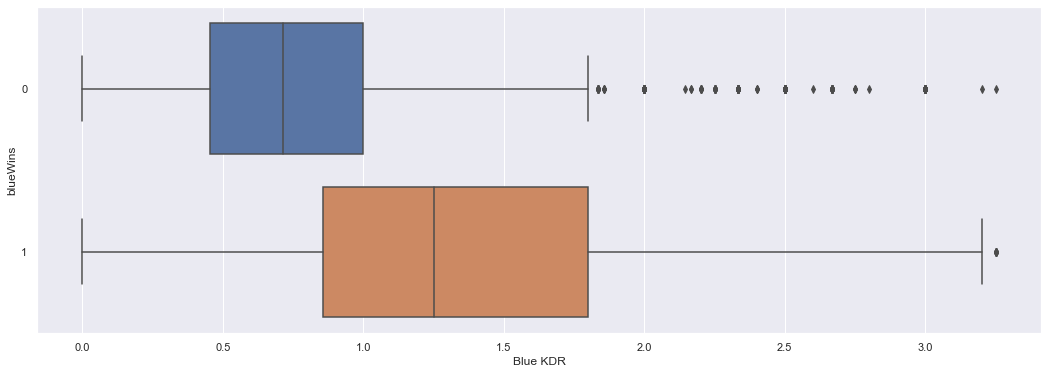

In [77]:
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "Blue KDR", y = "blueWins", data = combined, orient = "h")

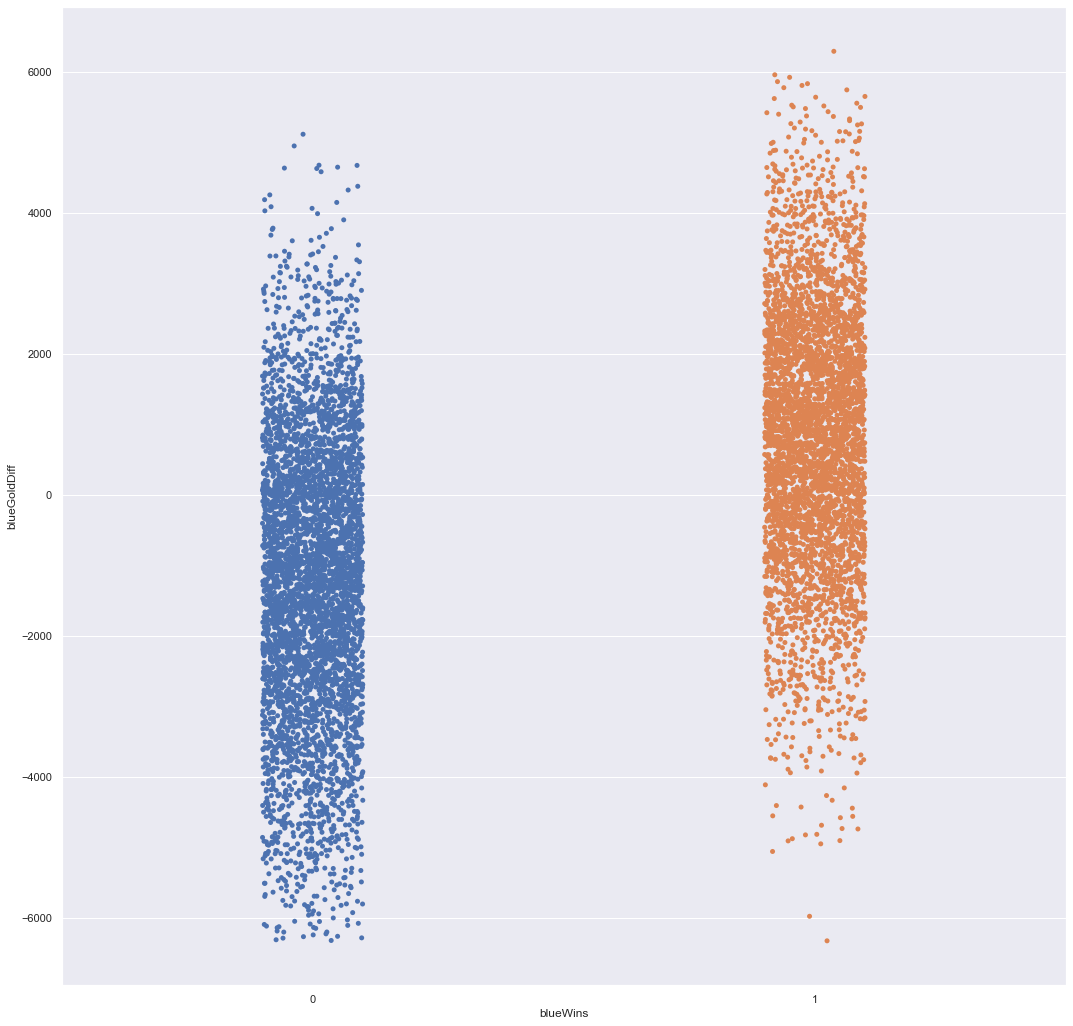

In [78]:
f = plt.figure(figsize=(18, 18))
ax = sb.stripplot(x="blueWins", y="blueGoldDiff", data=combined)

<AxesSubplot:xlabel='blueGoldDiff', ylabel='blueWins'>

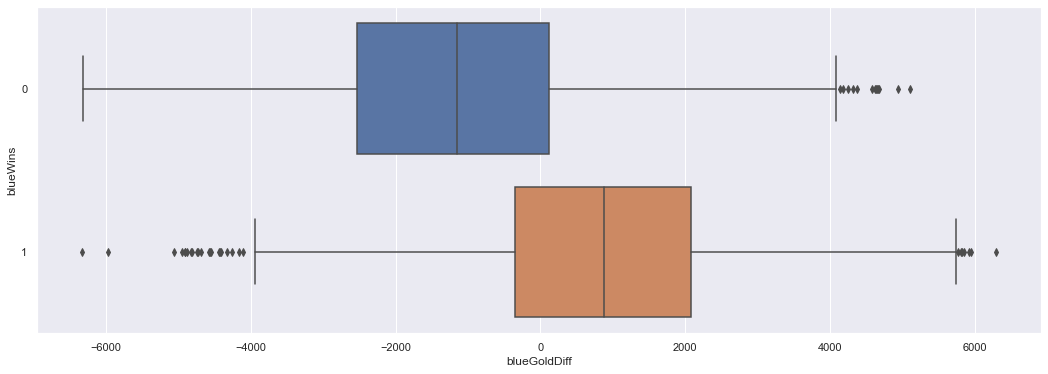

In [79]:
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "blueGoldDiff", y = "blueWins", data = combined, orient = "h")

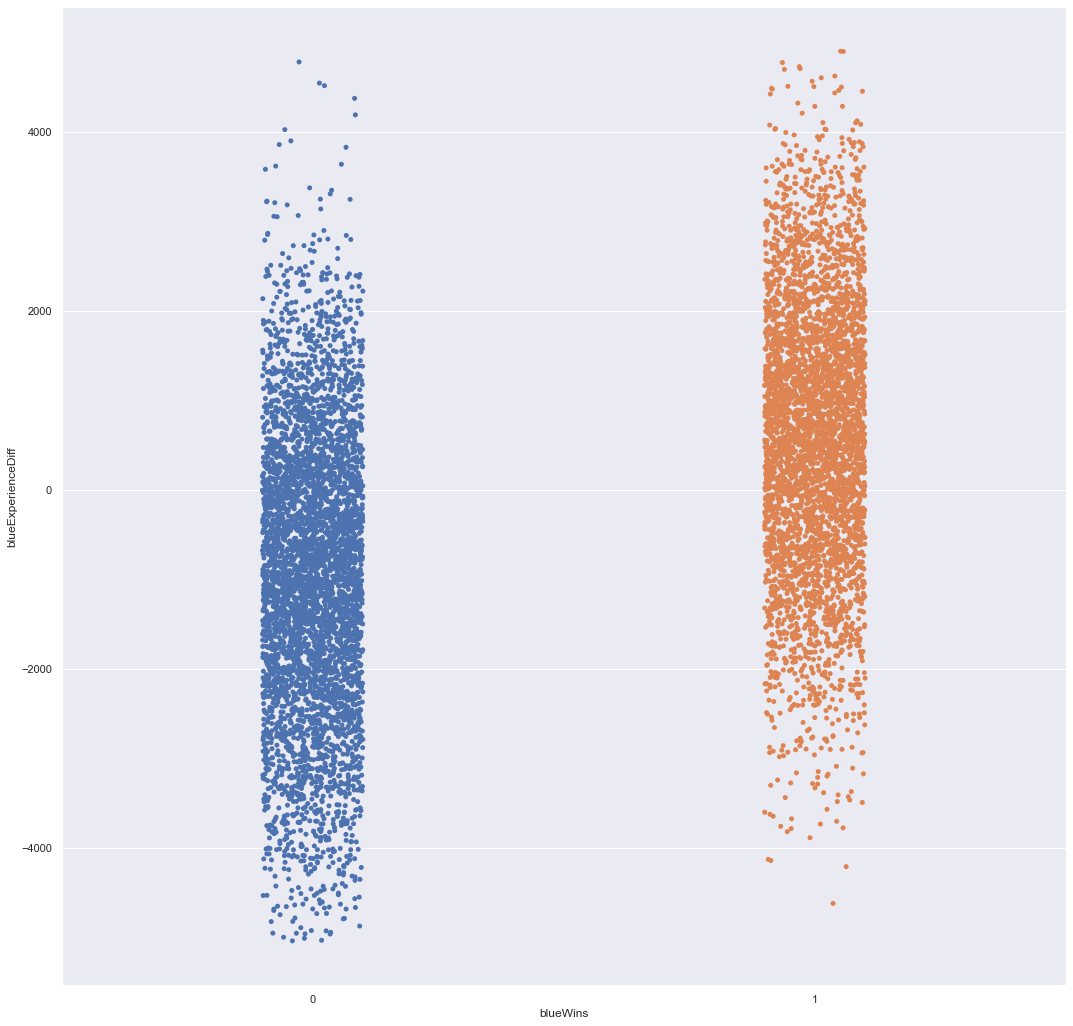

In [80]:
f = plt.figure(figsize=(18, 18))
ax = sb.stripplot(x="blueWins", y="blueExperienceDiff", data=combined)

<AxesSubplot:xlabel='blueExperienceDiff', ylabel='blueWins'>

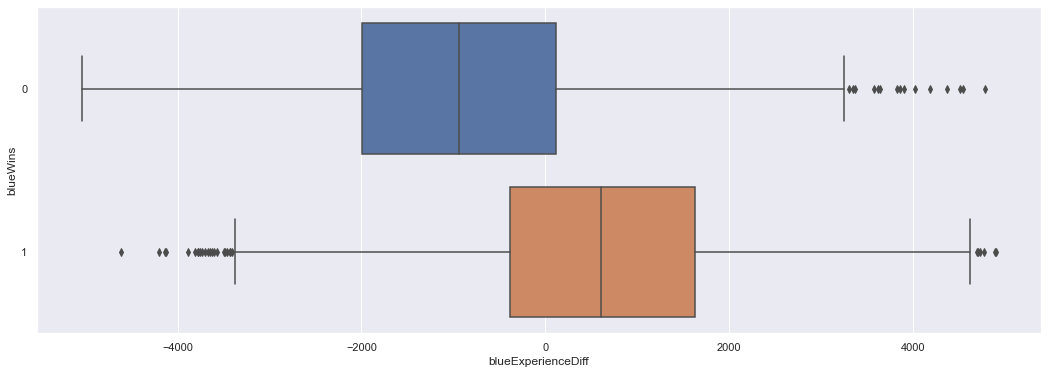

In [81]:
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "blueExperienceDiff", y = "blueWins", data = combined, orient = "h")

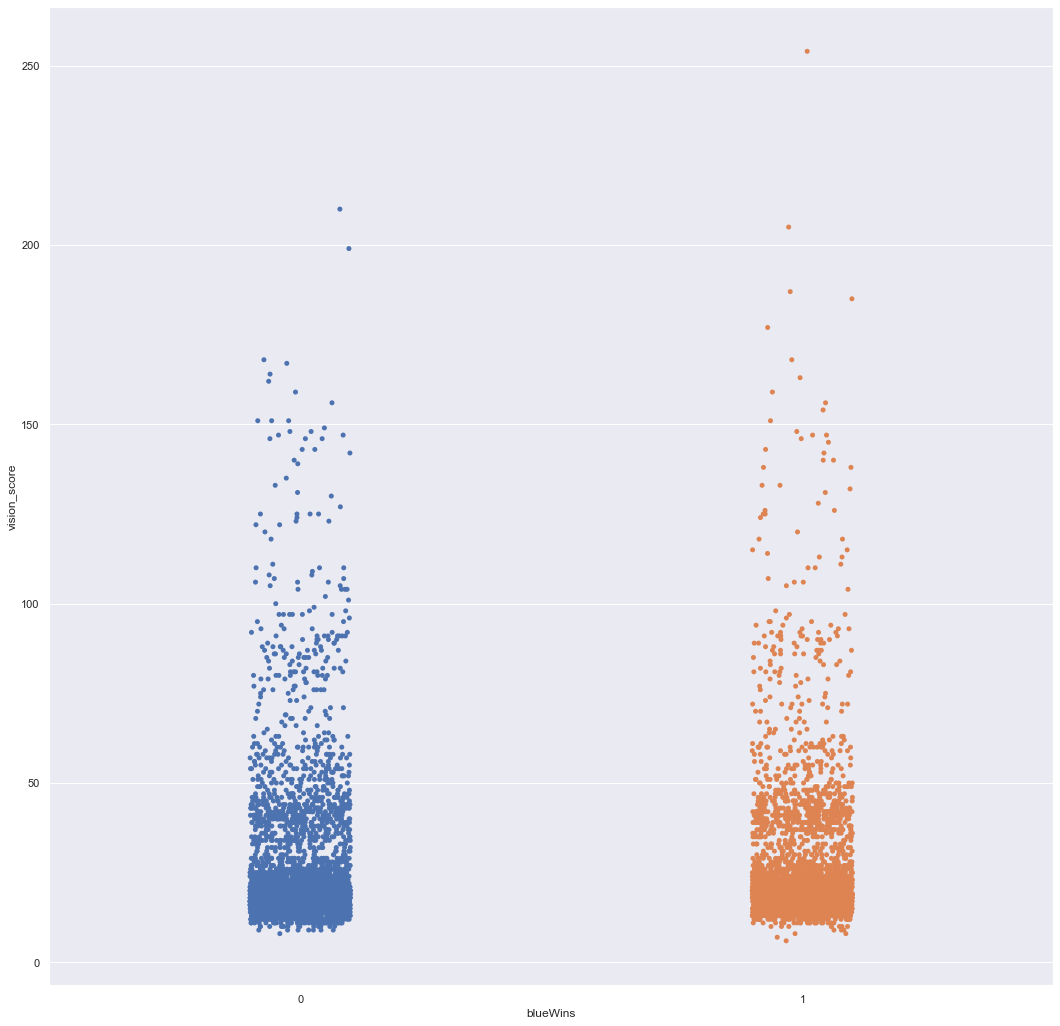

In [82]:
f = plt.figure(figsize=(18, 18))
ax = sb.stripplot(x="blueWins", y="vision_score", data=combined)

<AxesSubplot:xlabel='vision_score', ylabel='blueWins'>

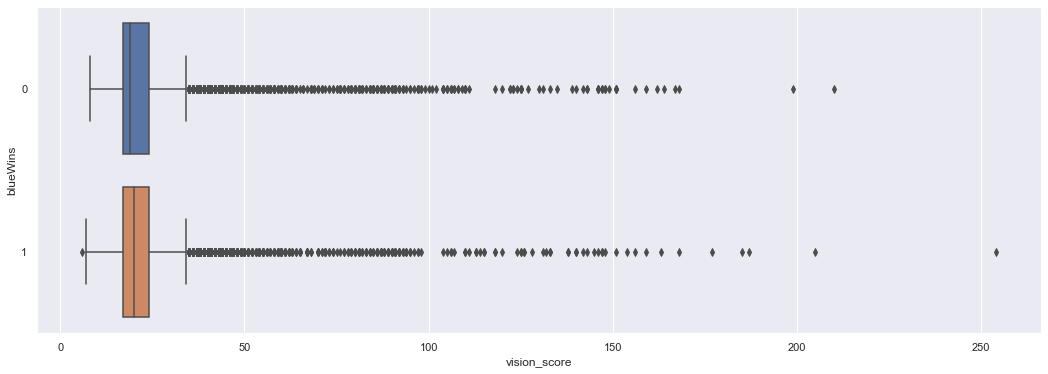

In [83]:
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "vision_score", y = "blueWins", data = combined, orient = "h")

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
feature_cols = ['Blue KDR', 'blueGoldDiff', 'blueExperienceDiff', 'vision_score']
B = pd.DataFrame(cleaned['Blue KDR'])
G = pd.DataFrame(cleaned.blueGoldDiff)
E = pd.DataFrame(cleaned.blueExperienceDiff)
V = pd.DataFrame(cleaned.vision_score)
Y = pd.DataFrame(cleaned.blueWins)
B_train,B_test,y_train,y_test,G_train,G_test,E_train,E_test,V_train,V_test= train_test_split(B, Y, G, E, V, test_size = 0.2, random_state = 42)
logreg = LogisticRegression()
B_train.head()

logreg.fit(B_train,y_train.values.ravel())
y_predB=logreg.predict(B_test)
y_predB_train=logreg.predict(B_train)
logreg.fit(G_train,y_train.values.ravel())
y_predG=logreg.predict(G_test)
y_predG_train=logreg.predict(G_train)
logreg.fit(E_train,y_train.values.ravel())
y_predE=logreg.predict(E_test)
y_predE_train=logreg.predict(E_train)
logreg.fit(V_train,y_train.values.ravel())
y_predV=logreg.predict(V_test)
y_predV_train=logreg.predict(V_train)


In [85]:
from sklearn import metrics
cnf_matrixB = metrics.confusion_matrix(y_test, y_predB)
cnf_matrixG= metrics.confusion_matrix(y_test, y_predG)
cnf_matrixE= metrics.confusion_matrix(y_test, y_predE)
cnf_matrixV= metrics.confusion_matrix(y_test, y_predV)

cnf_matrixB_train = metrics.confusion_matrix(y_train, y_predB_train)
cnf_matrixG_train = metrics.confusion_matrix(y_train, y_predG_train)
cnf_matrixE_train = metrics.confusion_matrix(y_train, y_predE_train)
cnf_matrixV_train = metrics.confusion_matrix(y_train, y_predV_train)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6768595041322314
True Positive Rate 	 	: 0.5650644783118406
False Positive Rate 	 	: 0.224012474012474
Precision 	 	 	: 0.6910394265232975

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6936639118457301
True Positive Rate 	 	: 0.5862068965517241
False Positive Rate 	 	: 0.2074074074074074
Precision 	 	 	: 0.7223796033994334


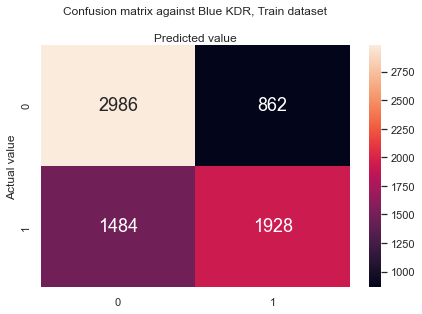

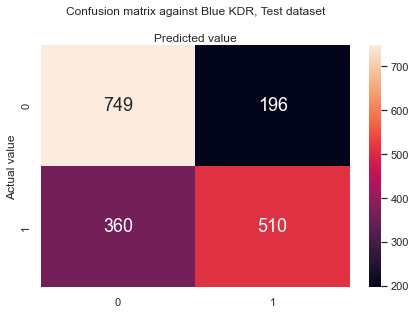

In [86]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(cnf_matrixB_train),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against Blue KDR, Train dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = cnf_matrixB_train[1][1]
TN = cnf_matrixB_train[0][0]
FP = cnf_matrixB_train[0][1]
FN = cnf_matrixB_train[1][0]
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_train, y_predB_train))
print("True Positive Rate \t \t:", metrics.recall_score(y_train, y_predB_train))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_train, y_predB_train))
print("")

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(cnf_matrixB),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against Blue KDR, Test dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = cnf_matrixB[1][1]
TN = cnf_matrixB[0][0]
FP = cnf_matrixB[0][1]
FN = cnf_matrixB[1][0]
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_test, y_predB))
print("True Positive Rate \t \t:", metrics.recall_score(y_test, y_predB))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_test, y_predB))


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7023415977961432
True Positive Rate 	 	: 0.6799531066822978
False Positive Rate 	 	: 0.2778066528066528
Precision 	 	 	: 0.6845677190911773

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.725068870523416
True Positive Rate 	 	: 0.6988505747126437
False Positive Rate 	 	: 0.2507936507936508
Precision 	 	 	: 0.7195266272189349


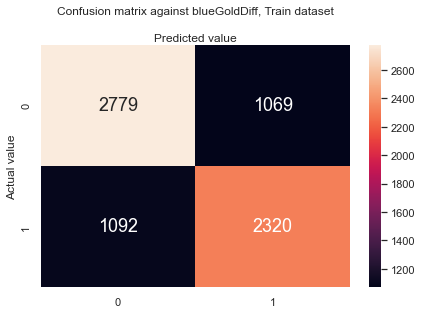

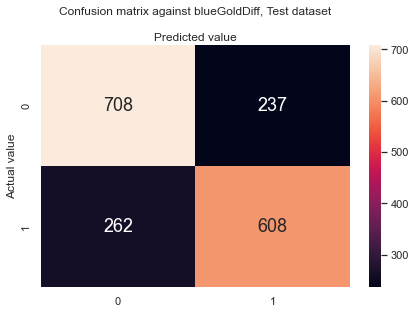

In [87]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(cnf_matrixG_train),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against blueGoldDiff, Train dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = cnf_matrixG_train[1][1]
TN = cnf_matrixG_train[0][0]
FP = cnf_matrixG_train[0][1]
FN = cnf_matrixG_train[1][0]
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_train, y_predG_train))
print("True Positive Rate \t \t:", metrics.recall_score(y_train, y_predG_train))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_train, y_predG_train))
print("")

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(cnf_matrixG),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against blueGoldDiff, Test dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = cnf_matrixG[1][1]
TN = cnf_matrixG[0][0]
FP = cnf_matrixG[0][1]
FN = cnf_matrixG[1][0]
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_test, y_predG))
print("True Positive Rate \t \t:", metrics.recall_score(y_test, y_predG))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_test, y_predG))


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6954545454545454
True Positive Rate 	 	: 0.6614888628370457
False Positive Rate 	 	: 0.27442827442827444
Precision 	 	 	: 0.6812556595230909

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7019283746556474
True Positive Rate 	 	: 0.6701149425287356
False Positive Rate 	 	: 0.2687830687830688
Precision 	 	 	: 0.6965352449223416


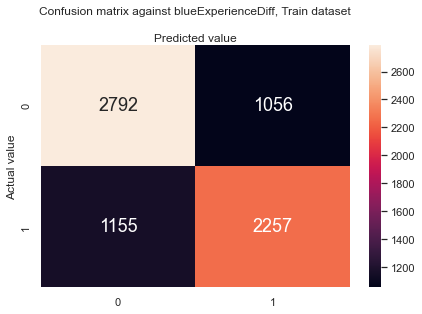

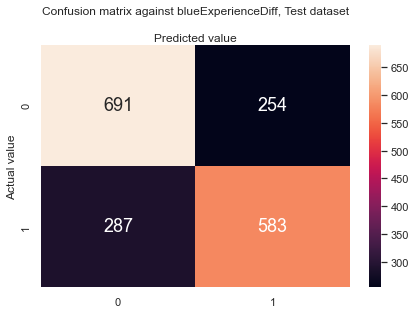

In [88]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(cnf_matrixE_train),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against blueExperienceDiff, Train dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = cnf_matrixE_train[1][1]
TN = cnf_matrixE_train[0][0]
FP = cnf_matrixE_train[0][1]
FN = cnf_matrixE_train[1][0]
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_train, y_predE_train))
print("True Positive Rate \t \t:", metrics.recall_score(y_train, y_predE_train))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_train, y_predE_train))
print("")

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(cnf_matrixE),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against blueExperienceDiff, Test dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = cnf_matrixE[1][1]
TN = cnf_matrixE[0][0]
FP = cnf_matrixE[0][1]
FN = cnf_matrixE[1][0]
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_test, y_predE))
print("True Positive Rate \t \t:", metrics.recall_score(y_test, y_predE))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_test, y_predE))


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5297520661157025
True Positive Rate 	 	: 0.0076201641266119575
False Positive Rate 	 	: 0.007276507276507277
Precision 	 	 	: 0.48148148148148145

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5206611570247934
True Positive Rate 	 	: 0.005747126436781609
False Positive Rate 	 	: 0.005291005291005291
Precision 	 	 	: 0.5


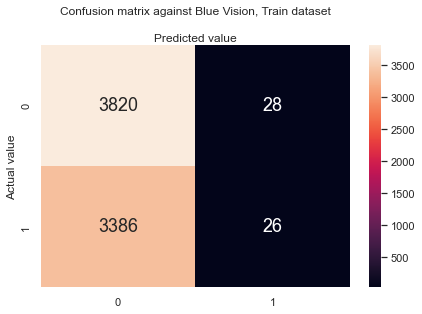

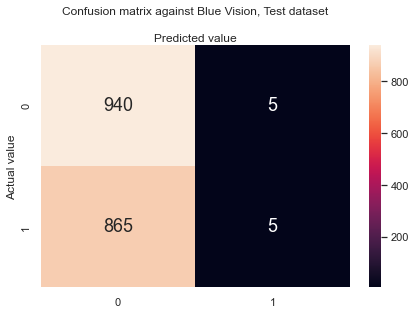

In [89]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(cnf_matrixV_train),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against Blue Vision, Train dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = cnf_matrixV_train[1][1]
TN = cnf_matrixV_train[0][0]
FP = cnf_matrixV_train[0][1]
FN = cnf_matrixV_train[1][0]
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_train, y_predV_train))
print("True Positive Rate \t \t:", metrics.recall_score(y_train, y_predV_train))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_train, y_predV_train))
print("")

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(cnf_matrixV),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against Blue Vision, Test dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = cnf_matrixV[1][1]
TN = cnf_matrixV[0][0]
FP = cnf_matrixV[0][1]
FN = cnf_matrixV[1][0]
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_test, y_predV))
print("True Positive Rate \t \t:", metrics.recall_score(y_test, y_predV))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_test, y_predV))


[Text(334.8, 570.7800000000001, 'Blue KDR <= 0.92\ngini = 0.498\nsamples = 7260\nvalue = [3848, 3412]\nclass = Purple Win'),
 Text(167.4, 407.70000000000005, 'Blue KDR <= 0.655\ngini = 0.403\nsamples = 3480\nvalue = [2505, 975]\nclass = Purple Win'),
 Text(83.7, 244.62, 'Blue KDR <= 0.392\ngini = 0.323\nsamples = 2078\nvalue = [1657, 421]\nclass = Purple Win'),
 Text(41.85, 81.53999999999996, 'gini = 0.224\nsamples = 808\nvalue = [704, 104]\nclass = Purple Win'),
 Text(125.55000000000001, 81.53999999999996, 'gini = 0.375\nsamples = 1270\nvalue = [953, 317]\nclass = Purple Win'),
 Text(251.10000000000002, 244.62, 'Blue KDR <= 0.793\ngini = 0.478\nsamples = 1402\nvalue = [848, 554]\nclass = Purple Win'),
 Text(209.25, 81.53999999999996, 'gini = 0.46\nsamples = 735\nvalue = [471, 264]\nclass = Purple Win'),
 Text(292.95, 81.53999999999996, 'gini = 0.491\nsamples = 667\nvalue = [377, 290]\nclass = Purple Win'),
 Text(502.20000000000005, 407.70000000000005, 'Blue KDR <= 1.528\ngini = 0.458\

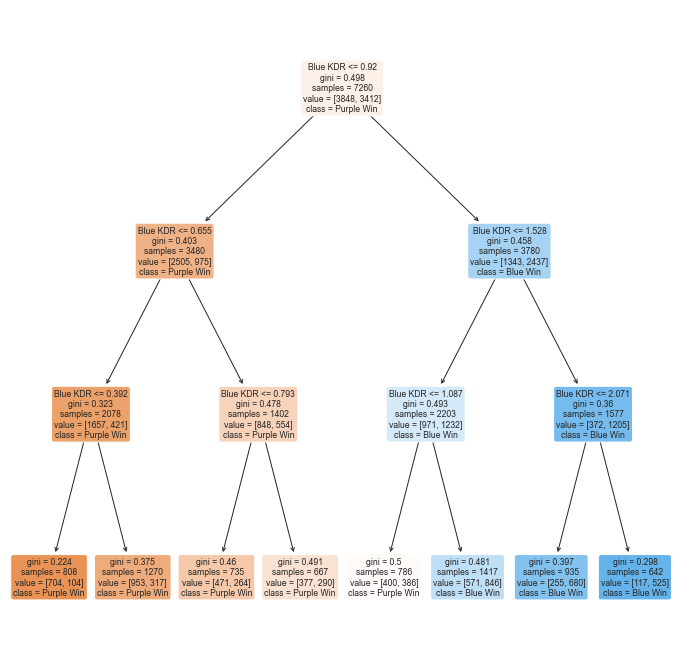

In [90]:
dectree1 = DecisionTreeClassifier(max_depth = 3)
dectree1.fit(B_train, y_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["Blue KDR"], 
          class_names=["Purple Win","Blue Win"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6826446280991736
True Positive Rate 	 	: 0.6011137162954279
False Positive Rate 	 	: 0.24506237006237006
Precision 	 	 	: 0.6850367401469606

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7008264462809918
True Positive Rate 	 	: 0.6206896551724138
False Positive Rate 	 	: 0.2253968253968254
Precision 	 	 	: 0.7171314741035857


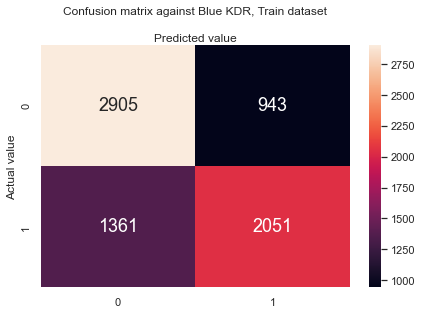

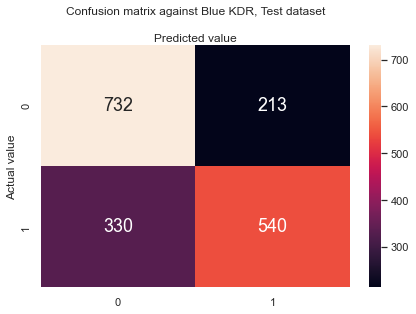

In [91]:
dectree1 = DecisionTreeClassifier(max_depth = 3)
dectree1.fit(B_train, y_train)

y_train_pred = dectree1.predict(B_train)
y_test_pred = dectree1.predict(B_test)

tree_cnf_matrixB_train = confusion_matrix(y_train, y_train_pred)
tree_cnf_matrixB = confusion_matrix(y_test, y_test_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(tree_cnf_matrixB_train),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against Blue KDR, Train dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = tree_cnf_matrixB_train[1][1]
TN = tree_cnf_matrixB_train[0][0]
FP = tree_cnf_matrixB_train[0][1]
FN = tree_cnf_matrixB_train[1][0]
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_train, y_train_pred))
print("True Positive Rate \t \t:", metrics.recall_score(y_train, y_train_pred))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_train, y_train_pred))
print("")

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(tree_cnf_matrixB),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against Blue KDR, Test dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = tree_cnf_matrixB[1][1]
TN = tree_cnf_matrixB[0][0]
FP = tree_cnf_matrixB[0][1]
FN = tree_cnf_matrixB[1][0]
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_test, y_test_pred))
print("True Positive Rate \t \t:", metrics.recall_score(y_test, y_test_pred))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_test, y_test_pred))


[Text(334.8, 570.7800000000001, 'Blue Gold Diff <= 57.0\ngini = 0.498\nsamples = 7260\nvalue = [3848, 3412]\nclass = Purple Win'),
 Text(167.4, 407.70000000000005, 'Blue Gold Diff <= -1477.5\ngini = 0.406\nsamples = 3945\nvalue = [2827, 1118]\nclass = Purple Win'),
 Text(83.7, 244.62, 'Blue Gold Diff <= -2931.0\ngini = 0.282\nsamples = 2013\nvalue = [1671, 342]\nclass = Purple Win'),
 Text(41.85, 81.53999999999996, 'gini = 0.166\nsamples = 810\nvalue = [736, 74]\nclass = Purple Win'),
 Text(125.55000000000001, 81.53999999999996, 'gini = 0.346\nsamples = 1203\nvalue = [935, 268]\nclass = Purple Win'),
 Text(251.10000000000002, 244.62, 'Blue Gold Diff <= -957.5\ngini = 0.481\nsamples = 1932\nvalue = [1156, 776]\nclass = Purple Win'),
 Text(209.25, 81.53999999999996, 'gini = 0.438\nsamples = 621\nvalue = [420, 201]\nclass = Purple Win'),
 Text(292.95, 81.53999999999996, 'gini = 0.492\nsamples = 1311\nvalue = [736, 575]\nclass = Purple Win'),
 Text(502.20000000000005, 407.70000000000005, '

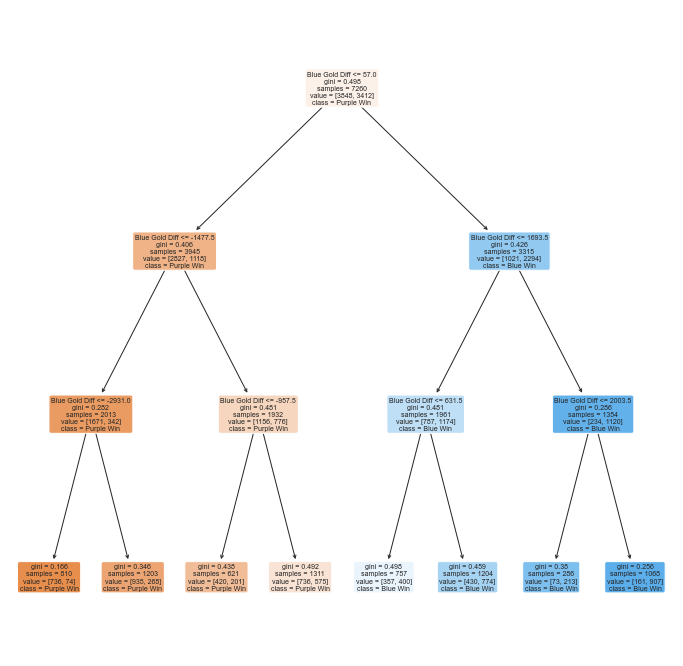

In [92]:
dectree2 = DecisionTreeClassifier(max_depth = 3)
dectree2.fit(G_train, y_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["Blue Gold Diff"], 
          class_names=["Purple Win","Blue Win"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7053719008264463
True Positive Rate 	 	: 0.6723329425556858
False Positive Rate 	 	: 0.2653326403326403
Precision 	 	 	: 0.6920060331825038

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7223140495867768
True Positive Rate 	 	: 0.6850574712643678
False Positive Rate 	 	: 0.24338624338624337
Precision 	 	 	: 0.7215496368038741


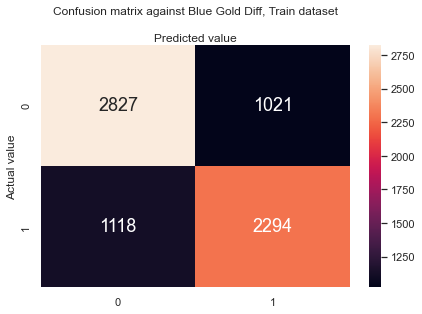

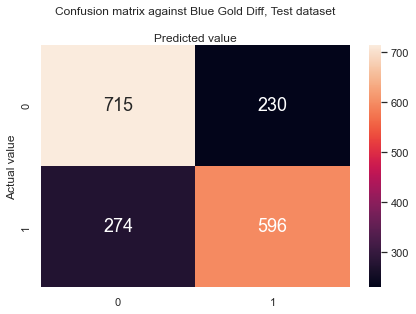

In [93]:
dectree2 = DecisionTreeClassifier(max_depth = 3)
dectree2.fit(G_train, y_train)

y_train_pred = dectree2.predict(G_train)
y_test_pred = dectree2.predict(G_test)

tree_cnf_matrixG_train = confusion_matrix(y_train, y_train_pred)
tree_cnf_matrixG = confusion_matrix(y_test, y_test_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(tree_cnf_matrixG_train),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against Blue Gold Diff, Train dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = tree_cnf_matrixG_train[1][1]
TN = tree_cnf_matrixG_train[0][0]
FP = tree_cnf_matrixG_train[0][1]
FN = tree_cnf_matrixG_train[1][0]
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_train, y_train_pred))
print("True Positive Rate \t \t:", metrics.recall_score(y_train, y_train_pred))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_train, y_train_pred))
print("")

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(tree_cnf_matrixG),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against Blue Gold Diff, Test dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = tree_cnf_matrixG[1][1]
TN = tree_cnf_matrixG[0][0]
FP = tree_cnf_matrixG[0][1]
FN = tree_cnf_matrixG[1][0]
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_test, y_test_pred))
print("True Positive Rate \t \t:", metrics.recall_score(y_test, y_test_pred))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_test, y_test_pred))


[Text(334.8, 570.7800000000001, 'Blue Exp Diff <= -307.5\ngini = 0.498\nsamples = 7260\nvalue = [3848, 3412]\nclass = Purple Win'),
 Text(167.4, 407.70000000000005, 'Blue Exp Diff <= -1758.5\ngini = 0.386\nsamples = 3406\nvalue = [2517, 889]\nclass = Purple Win'),
 Text(83.7, 244.62, 'Blue Exp Diff <= -2418.0\ngini = 0.245\nsamples = 1342\nvalue = [1150, 192]\nclass = Purple Win'),
 Text(41.85, 81.53999999999996, 'gini = 0.177\nsamples = 764\nvalue = [689, 75]\nclass = Purple Win'),
 Text(125.55000000000001, 81.53999999999996, 'gini = 0.323\nsamples = 578\nvalue = [461, 117]\nclass = Purple Win'),
 Text(251.10000000000002, 244.62, 'Blue Exp Diff <= -813.5\ngini = 0.447\nsamples = 2064\nvalue = [1367, 697]\nclass = Purple Win'),
 Text(209.25, 81.53999999999996, 'gini = 0.419\nsamples = 1258\nvalue = [882, 376]\nclass = Purple Win'),
 Text(292.95, 81.53999999999996, 'gini = 0.479\nsamples = 806\nvalue = [485, 321]\nclass = Purple Win'),
 Text(502.20000000000005, 407.70000000000005, 'Blue

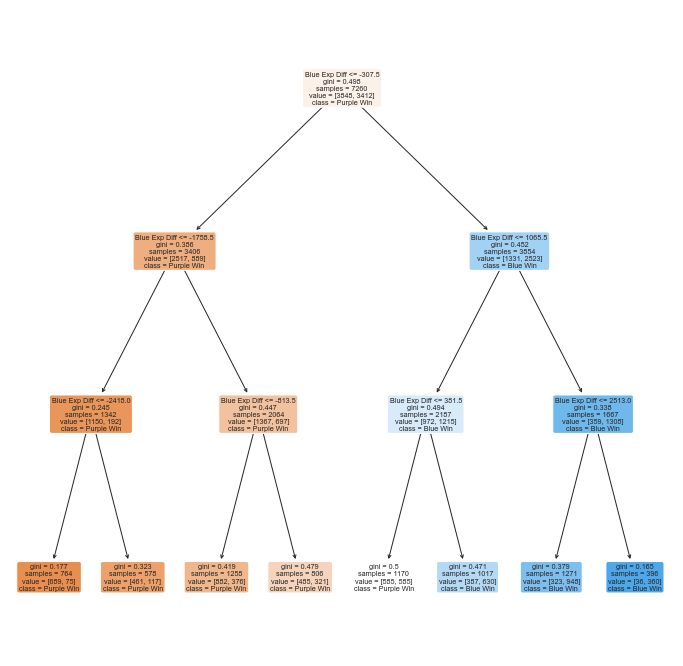

In [94]:
dectree3 = DecisionTreeClassifier(max_depth = 3)
dectree3.fit(E_train, y_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=["Blue Exp Diff"], 
          class_names=["Purple Win","Blue Win"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6942148760330579
True Positive Rate 	 	: 0.5679953106682297
False Positive Rate 	 	: 0.19386694386694386
Precision 	 	 	: 0.7220566318926974

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6942148760330579
True Positive Rate 	 	: 0.5597701149425287
False Positive Rate 	 	: 0.182010582010582
Precision 	 	 	: 0.7389984825493171


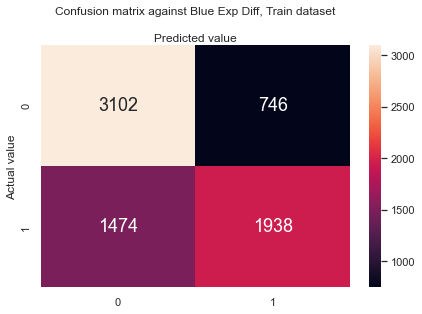

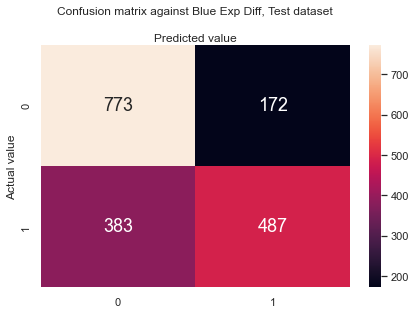

In [95]:
dectree3 = DecisionTreeClassifier(max_depth = 3)
dectree3.fit(E_train, y_train)

y_train_pred = dectree3.predict(E_train)
y_test_pred = dectree3.predict(E_test)

tree_cnf_matrixE_train = confusion_matrix(y_train, y_train_pred)
tree_cnf_matrixE = confusion_matrix(y_test, y_test_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(tree_cnf_matrixE_train),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against Blue Exp Diff, Train dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = tree_cnf_matrixE_train[1][1]
TN = tree_cnf_matrixE_train[0][0]
FP = tree_cnf_matrixE_train[0][1]
FN = tree_cnf_matrixE_train[1][0]
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_train, y_train_pred))
print("True Positive Rate \t \t:", metrics.recall_score(y_train, y_train_pred))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_train, y_train_pred))
print("")

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(tree_cnf_matrixE),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against Blue Exp Diff, Test dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = tree_cnf_matrixE[1][1]
TN = tree_cnf_matrixE[0][0]
FP = tree_cnf_matrixE[0][1]
FN = tree_cnf_matrixE[1][0]
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_test, y_test_pred))
print("True Positive Rate \t \t:", metrics.recall_score(y_test, y_test_pred))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_test, y_test_pred))


[Text(283.2923076923077, 570.7800000000001, 'Blue Vision <= 15.5\ngini = 0.498\nsamples = 7260\nvalue = [3848, 3412]\nclass = Purple Win'),
 Text(103.01538461538462, 407.70000000000005, 'Blue Vision <= 8.5\ngini = 0.482\nsamples = 1129\nvalue = [673, 456]\nclass = Purple Win'),
 Text(51.50769230769231, 244.62, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Blue Win'),
 Text(154.52307692307693, 244.62, 'Blue Vision <= 12.5\ngini = 0.481\nsamples = 1125\nvalue = [673, 452]\nclass = Purple Win'),
 Text(103.01538461538462, 81.53999999999996, 'gini = 0.431\nsamples = 175\nvalue = [120, 55]\nclass = Purple Win'),
 Text(206.03076923076924, 81.53999999999996, 'gini = 0.487\nsamples = 950\nvalue = [553, 397]\nclass = Purple Win'),
 Text(463.5692307692308, 407.70000000000005, 'Blue Vision <= 21.5\ngini = 0.499\nsamples = 6131\nvalue = [3175, 2956]\nclass = Purple Win'),
 Text(360.55384615384617, 244.62, 'Blue Vision <= 17.5\ngini = 0.498\nsamples = 3645\nvalue = [1930, 1715]\nclass = Purple W

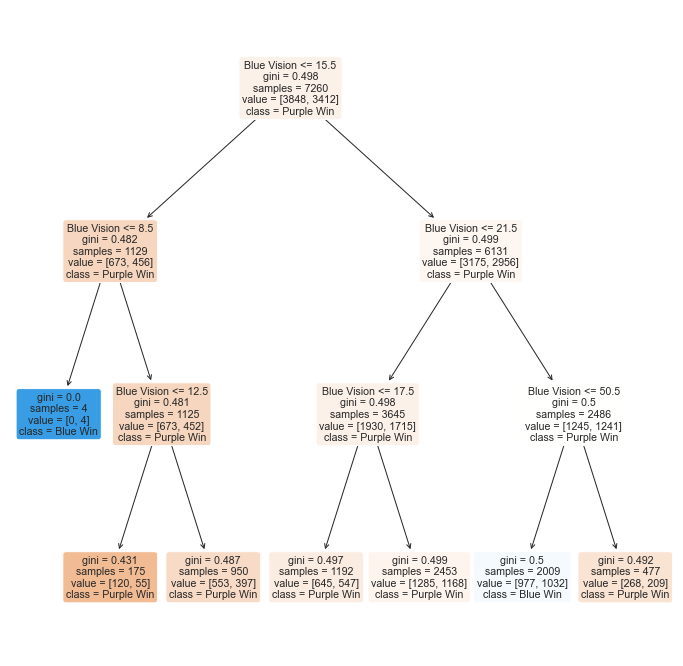

In [96]:
dectree4 = DecisionTreeClassifier(max_depth = 3)
dectree4.fit(V_train, y_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["Blue Vision"], 
          class_names=["Purple Win","Blue Win"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5381542699724517
True Positive Rate 	 	: 0.30363423212192264
False Positive Rate 	 	: 0.2538981288981289
Precision 	 	 	: 0.5146547441629409

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5272727272727272
True Positive Rate 	 	: 0.30114942528735633
False Positive Rate 	 	: 0.26455026455026454
Precision 	 	 	: 0.51171875


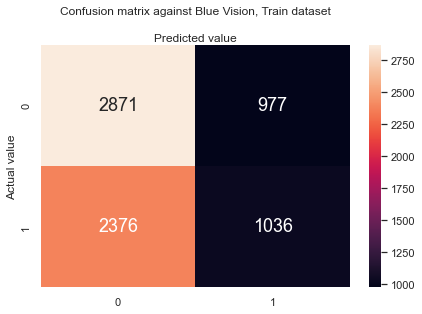

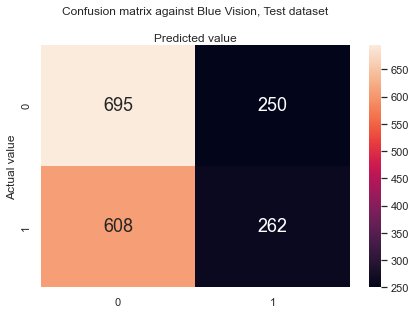

In [97]:
dectree4 = DecisionTreeClassifier(max_depth = 3)
dectree4.fit(V_train, y_train)

y_train_pred = dectree4.predict(V_train)
y_test_pred = dectree4.predict(V_test)

tree_cnf_matrixV_train = confusion_matrix(y_train, y_train_pred)
tree_cnf_matrixV = confusion_matrix(y_test, y_test_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(tree_cnf_matrixV_train),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against Blue Vision, Train dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = tree_cnf_matrixV_train[1][1]
TN = tree_cnf_matrixV_train[0][0]
FP = tree_cnf_matrixV_train[0][1]
FN = tree_cnf_matrixV_train[1][0]
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_train, y_train_pred))
print("True Positive Rate \t \t:", metrics.recall_score(y_train, y_train_pred))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_train, y_train_pred))
print("")

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(tree_cnf_matrixV),
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix against Blue Vision, Test dataset', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
TP = tree_cnf_matrixV[1][1]
TN = tree_cnf_matrixV[0][0]
FP = tree_cnf_matrixV[0][1]
FN = tree_cnf_matrixV[1][0]
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_test, y_test_pred))
print("True Positive Rate \t \t:", metrics.recall_score(y_test, y_test_pred))
print("False Positive Rate \t \t:", FP/(FP+TN))
print("Precision \t \t \t:",metrics.precision_score(y_test, y_test_pred))
